# Integers

Integer numbers are represented by N bit words. Python3 allows you to store integers with practically **unlimited precision**, the only limitation comes from the (contiguous) space available in memory.
In Python2 (deprecated), N depends on the PC architercture, N=64 in modern computers.

In [1]:
# Check the largest integer
import sys
print(sys.maxsize)

# Check also that corresponds to a 64-bit integer
print("Is your system a 64 bit one?", 2**63 - 1 == sys.maxsize)

# Python 3 doesn't have a limit for integers
maxint = sys.maxsize+1
print(maxint)

9223372036854775807
Is your system a 64 bit one? True
9223372036854775808


## Binary and Hexadecimal representations

The common assumption is that numbers (in Python as in all the other languages) are expressed as decimal numbers. Built-in functions allows explicitly to convert from one base to another.  

In the binary representation, typically 1 bit ($j$) is dedicated to specifying the sign of the number, and the conversion between binary and decimal representation is:

$$d = (-1)^j\sum_{i=0}^{N-1} \alpha_i ~ 2^i$$

where $\alpha_i$ are either 0 or 1. 
$b=\alpha_{N-1}\alpha_{N-2}..\alpha_0$ is the binary representation of the number.

Example: an 8-bit integer in binary representation with one bit for the sign:

|  j | 6 | 5 | 4 | 3 | 2 | 1 | 0  |
|---|---|---|---|---|---|---|---|
|  0 | 0 | 0 | 1 | 0 | 1 | 1 | 1  |

corresponds to:

$$d = (-1)^j\sum_{i=0}^{N-1} \alpha_i ~ 2^i = (-1)^{0} [ (1) \cdot 2^0 + (1) \cdot 2^1 + (1) \cdot 2^2 + (0) \cdot 2^3 + (1) \cdot 2^4 + (0) \cdot 2^5 + (0) \cdot 2^6] = 0 + 1 + 2 + 4 + 16 = 23$$


In [1]:
# an integer in decimal representation
a = 23

# its binary representation
a_bin = bin(a)
print('Binary representation of', a, ':', a_bin)

# its hexadecimal representation
a_hex = hex(a)
print('Hexadecimal representation of', a, ':', a_hex)

# converting back to integer
print('Decimal representation of', a_bin, ':', int(a_bin, 2))
print('Decimal representation of', a_hex, ':', int(a_hex, 16))

Binary representation of 23 : 0b10111
Hexadecimal representation of 23 : 0x17
Decimal representation of 0b10111 : 23
Decimal representation of 0x17 : 23


## Bitwise operators

### Logical operators

In [2]:
a = 60           # 60 = 0011 1100 
b = 13           # 13 = 0000 1101 

print ("a:", bin(a)) # standard formatting, 0b.. ; not print the leading zeros
print("a:", f"{a:08b}") # print only bit values, including as many bits as requested
print("b:", f"{b:08b}")


c = a & b        
print("Bitwise AND ", f"{c:08b}", c)

c = a | b
print("Bitwise OR  ", f"{c:08b}", c)

c = a ^ b
print("Bitwise XOR ", f"{c:08b}", c)

a: 0b111100
a: 00111100
b: 00001101
Bitwise AND  00001100 12
Bitwise OR   00111101 61
Bitwise XOR  00110001 49


### Unary operators

#### bitwise NOT
given an integer *a*:

`
~a = ~bin(a)
   = -(bin(a)+1)
`

i.e. it returns the complement to (-) 1 of that number

In [5]:
print("-61 ", f"{-61:09b}") #one extra "bit" for the "-" simbol
print("~60 ", f"{~a:09b}")


-61  -00111101
~60  -00111101


### Shifts

In [6]:
c = a << 2       
print("Left shift (towards most significant) of two positions ", f"{c:08b}",c)

c = a >> 1       
print("Right shift (towards least significant) of two positions ", f"{c:08b}",c)

Left shift (towards most significant) of two positions  11110000 240
Right shift (towards least significant) of two positions  00011110 30


For more details check the python [documentation](https://realpython.com/python-bitwise-operators/).

# Floating point numbers

Non-integer number **cannot be represented with infinite precision** on a computer. Single precision (also known as *float*) and double precision numbers use 32 and 64 bits respectively. 
Note that all floating point numbers in python are double precision (64 bits).
A standard has been developed by IEEE such that the relative precision (see later) is the same across the whole validity range.

The 32 or 64 bits are divided among 3 quantities uniquely characterizing the number:

$x_{float} = (-1)^s \times 1.f \times 2^{e-bias}$

where *s* is the sign, *f* the fractional part of the mantissa and *e* the exponent. In order to get numbers in modulo smaller than 1, a constant *bias* term is added to the exponent, such *bias* is typically equal to half of the max value of *e*.
The mantissa is defined as:

${\rm mantissa}=1.f=1+m_{n-1}2^{-1}+m_{n-2}2^{-2}+..+m_{0}2^{-n}$

where $n$ is the number of bits dedicated to *f* (see below) and $m_i$ are the binary coefficients. 

Numbers exceeding the maximum allowed value are *overflows* and the calculations involving them provide incorrect answers. Numbers smaller in absolute value than the minimum allowed value are *underflows* and simply set to zero, also in this case incorrect results are yielded.  

### Single

For single precision floating point numbers, $0\le e \le 255$ and $bias=127$. Bits are arranged as follows:

|   | *s* | *e* | *f* |
|---|---|---|---|
| Bit position | 31 | 30-23 | 22-0 |

An example is given below:

In [7]:
from IPython.display import Image
Image(url='http://www.dspguide.com/graphics/F_4_2.gif')

Special values are also possibiles. N.B.: those are not numbers that can be used in the mathematical sense!

|   |  conditions | value |
|---|---|---|
|  $+\infty$ | s=0, e=255, f=0 | +INF  |
|  $-\infty$ | s=1, e=255, f=0 | -INF  |
|  not a number | e=255, f>0  | NaN  |

The largest value is obtained for $f\sim 2$ and $e=254$, i.e. $2\times2^{127}\sim 3.4\times10^{38}$.

The value closest to zero is obtained instead for $f=2^{-23}$ and $e=0$, i.e. $2^{-149}\sim 1.4\times10^{-45}$.


### Double

For double precision floating point numbers, $0\le e \le 2047$ and $bias=1023$. Bits are arranged as follows:

|   | *s* | *e* | *f* |
|---|---|---|---|
| Bit position | 63 | 62-52 | 51-0 |

Special values are also possibiles. N.B.: those are not numbers that can be used in the mathematical sense!

|   |  conditions | value |
|---|---|---|
|  $+\infty$ | s=0, e=2047, f=0 | +INF  |
|  $-\infty$ | s=1, e=2047, f=0 | -INF  |
|  not a number | e=2047, f>0  | NaN  |

The validity range for double numbers is $2.2^{-308} - 1.8^{308}$

Serious scientific calculations almost always requires at least double precision floating point numbers.

### Floating point numbers on your system

Information about the floating point representation on your system can be obtained from sys.float_info. Definitions of the stored values are given on the python doc [page](https://docs.python.org/2/library/sys.html#sys.float_info)

In [ ]:
import sys
print(sys.float_info)

# Accuracy and the perils of calculations with floats


Floats can only have a limited number of meaningful decimal places, on the basis of how many bits are allocated for the fractional part of the mantissa: 6-7 decimal places for singles, 15-16 for doubles. In particular this means that calculations involving numbers with more than those decimal places involved do not yield the correct result, simply because the binary representation of those numbers does not allow to store them with sufficient accuracy.

In [8]:
# Addding an increasingly small number to 7
for e in [14, 15, 16]: print (7+1.0*10**-e)

7.00000000000001
7.000000000000001
7.0


It should never been forgotten that computers store numbers in binary format. In the same way it is not possible to express the fraction 1/3 with a finite decimal places, analogously fraction well represented in the decimal base cannot be represented in binary, e.g. 1/10 is the infinitely repeating number:

$0.0001100110011001100110011001100110011001100110011...$

corresponding to $3602879701896397/2^{55}$ which is close to but not exactly equal to the true value of 1/10 (even though it is even printed to be like that!).
Similarly 0.1 is not 1/10, and making calculations assuming that exactly typically yield to wrong results:

In [1]:
print (1 / 10, 0.1)

# is 1/10 the same of 0.1?
print (1 / 10 == 0.1)

# but then watch out! Does it work for 0.3, too?
print ((0.1 + 0.2) == 0.3)


0.1 0.1
True
False


A lesson of paramount importance is that you must **never** compare floating point numbers with the "==" operator as *what is printed is not what is stored*!

The function ```float.hex()``` yield the exact value stored for a floating point number:

In [2]:
import math
x = math.pi
print(x)
print(x.hex())

3.141592653589793
0x1.921fb54442d18p+1


where `0x` is prefix, indicating a hexadecimal value,
`1.921fb54442d18` is the hexadecimal representation of the mantissa and 
`p+1` is the exponent that scales the mantissa to the correct power of 2.

There are ways to print floats (e.g. filling data into an output file) controlling the number of decimals:

In [3]:
print(format(math.pi, '.23f'))  # give 13 significant digits

print('%.16f' % (0.1 * 0.1 * 100)) 

# now repeat trying with >15 digits!

3.14159265358979311599796
1.0000000000000002


There is no bug here, this is simply due to the fact that the mantissa is represented by a limited amount of bits, therefore calculations can only make sense if an appropriate number of decimal digits are concerned:

In [4]:
# 23 bits are used for f in single precision floating point
print("Single precision:", 2**-23)

# 53 bits are used for f in double precision floating point
print("Double precision:", 2**-53)

Single precision: 1.1920928955078125e-07
Double precision: 1.1102230246251565e-16


A typical case is subtraction of numbers very close by in value (e.g. when dealing with spectral frequencies). The same happens with functions evaluated near critical points (see later)

In [5]:
6.022e23 - 6.022e23 +1

1.0

Associative law does not necessarily hold:

In [6]:
print (6.022e23 - 6.022e23 + 1)
print (1 + 6.022e23 - 6.022e23)

1.0
0.0


Distributive law does not hold

In [7]:
import math
a = math.exp(1)
b = math.pi
c = math.sin(1)
a*(b + c) == a*b + a*c

False

Also identities after casting large numbers may not yield the expected result

In [ ]:
x = 287475839859383374
print(x == int(float(x)))

## From numbers to functions: conditioning and stability

#### Function conditioning

A mathematical function $f(x)$ is well-conditioned if $f(x+\epsilon)\simeq f(x)$ for all small perturbations $\epsilon$.

In other words, the function $f(x)$ is **well-conditioned** if the solution varies gradually as the input varies. For a well-conditioned function, small pertubations in the input result in small effects in the output. However, a poorly-conditioned problem only needs some small perturbation to have large effects. For example, inverting a nearly singluar matrix (a matrix whose determinant is close to zero) is a poorly conditioned problem.

#### Algorithm stability

Suppose we have a computer algorithm $g(x)$ that represents the mathematical function $f(x)$. $g(x)$ is **numerically stable** if $g(x+\epsilon) \simeq f(x)$ and it is called **unstable** if large changes in the output are produced. Analyzing an algorithm for stability is more complicated than determining the condition of an expression, even if the algorithm simply evaluates the expression. This is because an algorithm consists of many basic calculations and each one must be analyzed and, due to roundoff error, we must consider the possibility of small errors being introduced in every computed value.

Numerically unstable algorithms tend to amplify approximation errors due to computer arithmetic over time. If we used an infinite precision numerical system, stable and unstable alorithms would have the same accuracy. However, as we see below (e.g. variance calculation), when using floating point numbers, algebrically equivalent algorithms can give different results.

In general, we need both a well-conditioned problem and an algorihtm with sufficient numerical stabilty to obtain reliably accurate answers. In this case, we can be sure that $g(x) \simeq f(x)$.

In most of the cases, the solution to stability issues is solved by properly redefining the function as in the example above and below.

1. Example of a poorly conditioned function: the tangent of an angle

`tan(x)` is usually implemented as a series of Chebyshev polynomials $T_n(x)$, which grants faster convergence than the Taylor expansion. They are defined in $[-1,1]$ in the following reccurent form:

$$
T_0(x)=1, \quad T_1(x) = x
$$
$$
T_{n+1}(x) = 2xT_n(x) - T_{n-1}(x), \quad {\rm for}\, n>0
$$

For the tangent we have:

$$
{\rm tan}(x) \approx c_0 T_0\left(\frac{4x}{\pi}\right) + c_1 T_1\left(\frac{4x}{\pi}\right) + \dots +c_5 T_5\left(\frac{4x}{\pi}\right)
$$

with $c_i=0$, $i$ even; $c_1=0.99986$, $c_3=0.3333314$, $c_5=0.1333923$

In [9]:
import math
# Define two numbers x and x + epsilon very close to pi/2
x1 = 1.57078
x2 = 1.57079
# Calculate the tangent of the x1 and x2 angles
t1 = math.tan(x1)
t2 = math.tan(x2)

print ('tan(x1) =', t1)
print ('tan(x2) =', t2)
print ('percent change in x =', 100.0*(x2-x1)/x1, '%')
print ('percent change in tan(x) =', (100.0*(t2-t1)/t1), '%')

tan(x1) = 61249.00853150303
tan(x2) = 158057.9134162482
percent change in x = 0.0006366263894271296 %
percent change in tan(x) = 158.05791343536953 %


2. Example of a numerically unstable algorithm: the limit      $\lim_{x \to 0} \frac{1-\cos(x)}{x^2}$

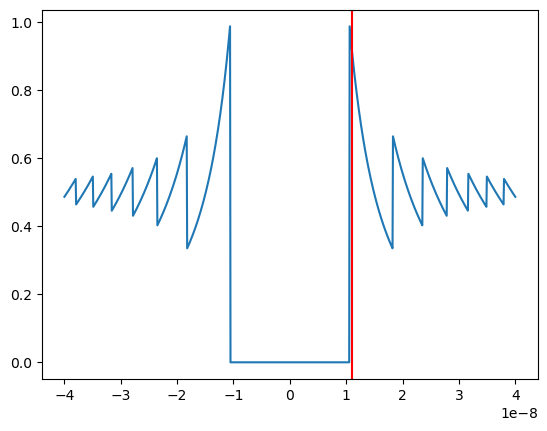

In [8]:
# Catastrophic cancellation occurs when subtracitng
# two numbers that are very close to one another
# Here is another example

# We'll see numpy and matplotlib in the next lectures: forget about the technical details, for now
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return (1 - np.cos(x))/(x*x)

#x = np.linspace(-4e-1, 4e-1, 1000)
x = np.linspace(-4e-8, 4e-8, 1000)
plt.plot(x, f(x))
plt.axvline(1.1e-8, color='red')

In [10]:
# We know from L'Hopital's rule that the answer is 0.5 at 0
# and should be very close to 0.5 throughout this tiny interval
# but errors arisee due to catastrophic cancellation

print('%.30f' % np.cos(1.1e-8))
print('%.30f' % (1 - np.cos(1.1e-8))) # failure point: the exact answer is 6.05e-17
print('%2f' % ((1 - np.cos(1.1e-8))/(1.1e-8*1.1e-8)))

0.999999999999999888977697537484
0.000000000000000111022302462516
0.917540


Solution: rewrite the function using $\sin$ instead of $\cos$: $1-\cos(x)$ = $2 \sin^2 (\frac{x}{2})$

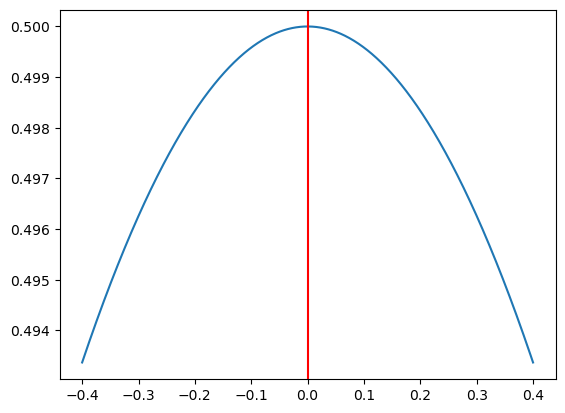

In [12]:
# Numerically stable version of funtion using simple trignometry

def f1(x):
    return 2*np.sin(x/2)**2/(x*x)

x = np.linspace(-4e-1, 4e-1, 1000)
#x = np.linspace(-4e-8, 4e-8, 1000)
plt.plot(x, f1(x))
plt.axvline(1.1e-8, color='red')

3. Another common example of a numerically unstable algorithm. The stable and unstable version of the (unbiased sample) variance:

$s^2 = \frac{1}{n-1} \sum (x-\bar{x})^2$

In [13]:
# direct method
# squaring occuring after subtraction
def direct_var(x):
    n = len(x)
    xbar = np.mean(x)
    return 1.0/(n-1)*np.sum((x - xbar)**2)

# sum of squares method (vectorized version)
# pay attention to the subtraction of two large numbers
def sum_of_squares_var(x):
    n = len(x)
    return (1.0/(n*(n-1))*(n*np.sum(x**2) - (np.sum(x))**2))

# Welford's method
# an optimized method
def welford_var(x):
    s = 0
    m = x[0]
    for i in range(1, len(x)):
        m += (x[i]-m)/i
        s += (x[i]-m)**2
    return s/(len(x) - 1)


# check the performances with an array 
# of randomly distributed data around 1e12
x_ = np.random.uniform(0, 1, int(1e3))
x = 1e12 + x_

# correct answer from a purpose-built function in numpy
print("Numpy:", np.var(x_))
print("Direct:", direct_var(x))
print("Sum of squares:", sum_of_squares_var(x))
print("Welford's:", welford_var(x))

Numpy: 0.0796910285192782
Direct: 0.07977157594026388
Sum of squares: -140878366.72205004
Welford's: 0.07916241008657832


4. The example of the Likelihood: $\mathcal{L} = \prod_{i=0}^{N} prob(x, \mu)$

In [ ]:
# loss of precision can be a problem when calculating Likelihoods
probs = np.random.random(1000) # Generating 1000 random numbers between 0 and 1, as if they were probabilities
#print(probs)
print("L =", np.prod(probs))

# when multiplying lots of small numbers, work in log space
print("log L =", np.sum(np.log(probs)))

#### Summary:

- Well-/ill-Conditioned refers to the problem; Stable/Unstable refers to an algorithm or numerical process.
- If the problem is well-conditioned then there is a stable way to solve it.
- If the problem is ill-conditioned then there is no reliable way to solve it in a stable way.
- Mixing roundoff-error with an unstable process is a recipe for disaster.
- With exact arithmetic (no roundoff-error), stability is not a concern.